In [1]:
import pandas as pd
import numpy as np

In [13]:
dir_train = 'C:/Users/FINSUS-Admin/Documents/gblasd/DDRUCNN/data/aptos2019-blindness-detection/train.csv'
APTOS_train = pd.read_csv(dir_train, delimiter=',', header='infer', encoding='utf-8')

dir_test  = 'C:/Users/FINSUS-Admin/Documents/gblasd/DDRUCNN/data/aptos2019-blindness-detection/test.csv'
APTOS_test = pd.read_csv(dir_test, delimiter=',', header='infer', encoding='utf-8')

In [14]:
APTOS_train

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
...,...,...
3657,ffa47f6a7bf4,2
3658,ffc04fed30e6,0
3659,ffcf7b45f213,2
3660,ffd97f8cd5aa,0


In [15]:
APTOS_test

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4
...,...
1923,ff2fd94448de
1924,ff4c945d9b17
1925,ff64897ac0d8
1926,ffa73465b705


In [30]:
import plotly.express as px

d = list(APTOS_train['diagnosis'].value_counts())
fig = px.bar(data_frame=APTOS_train,
             x=[x for x in range(len(d))], 
             y=d,
             width=720,
             height=500,
             title='Distribucion de imagenes (APTOS 2019 - train)',
             text_auto=True)
fig.show()

In [24]:
import shutil

dir = 'C:/Users/FINSUS-Admin/Documents/gblasd/DDRUCNN/data/aptos2019-blindness-detection/'

for var in APTOS_train.index:
    # Copia de la carpeta fuente a la destino
    dir_in  = dir + 'train_images/' + str(APTOS_train['id_code'][var]) + '.png'
    dir_out = dir + str(APTOS_train['diagnosis'][var]) + '/' + str(APTOS_train['id_code'][var]) + '.png'
    # print(dir_in, dir_out)
    shutil.copy(dir_in, dir_out)

In [31]:
import os
total_images = []
for dirs in range(5):
    initial_count = 0
    dir = 'C:/Users/FINSUS-Admin/Documents/gblasd/DDRUCNN/data/aptos2019-blindness-detection/{}'.format(dirs)
    for path in os.listdir(dir):
        if os.path.isfile(os.path.join(dir, path)):
            initial_count += 1
    total_images.append(initial_count)
    print('Class {} - {}'.format(dirs,initial_count))

Class 0 - 1805
Class 1 - 370
Class 2 - 988
Class 3 - 193
Class 4 - 291


In [57]:
import os
import shutil

carpeta_fuente = 'C:/Users/FINSUS-Admin/Documents/gblasd/DDRUCNN/data/aptos2019-blindness-detection'
carpeta_destino = 'C:/Users/FINSUS-Admin/Documents/gblasd/DDRUCNN/data/clean_balanced'


for j in range(5):
  for i, n in enumerate(os.listdir(carpeta_fuente + '/{}/'.format(j))):
    if i <= 180:
    #Copia de la carpeta fuente a la destino
      shutil.copy(carpeta_fuente + '/{}/'.format(j) + n, carpeta_destino + '/{}/'.format(j) + n)

In [58]:
import os

total_images_balanceadas = []

for dirs in range(5):
    initial_count = 0
    dir = 'C:/Users/FINSUS-Admin/Documents/gblasd/DDRUCNN/data/clean_balanced/{}'.format(dirs)
    for path in os.listdir(dir):
        if os.path.isfile(os.path.join(dir, path)):
            initial_count += 1
    total_images_balanceadas.append(initial_count)
    print(initial_count)

801
801
801
801
801


In [59]:
import plotly.express as px
fig = px.bar(total_images_balanceadas,
             x=[x for x in range(len(total_images_balanceadas))], 
             y=total_images_balanceadas,
             width=720,
             height=500,
             title='Distribucion de imagenes por clase',
             text_auto=True)
fig.show()

In [55]:
import os
import shutil

carpeta_fuente = 'C:/Users/FINSUS-Admin/Documents/gblasd/DDRUCNN/data/aptos2019-blindness-detection'
carpeta_destino = 'C:/Users/FINSUS-Admin/Documents/gblasd/DDRUCNN/data/clean_balanced'


for j in range(5):
    for i, n in enumerate(os.listdir(carpeta_destino + '/{}/'.format(j))):
        if str(carpeta_destino + '/{}/{}'.format(j,n)).endswith('.png'):
            try:
                print(carpeta_destino + '/{}/{}'.format(j,n))
                # os.remove(carpeta_destino + '/{}/{}'.format(j,n))
            except  OSError as e:
                print(f"Error:{ e.strerror}")

Found 3205 images belonging to 5 classes.
Found 800 images belonging to 5 classes.


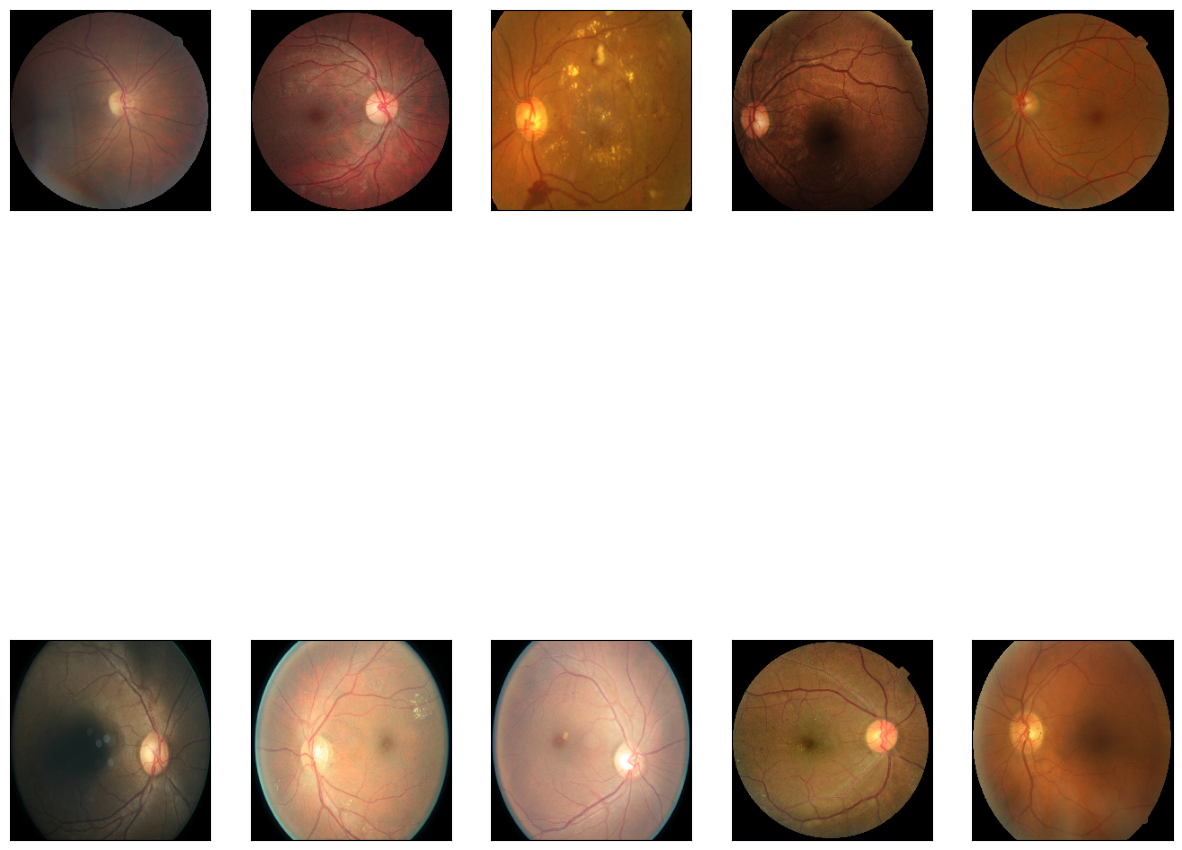

In [70]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    # rotation_range = 30,
    # width_shift_range = 0.25,
    # height_shift_range = 0.25,
    # shear_range = 15,
    # zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('C:/Users/FINSUS-Admin/Documents/gblasd/DDRUCNN/data/clean_balanced', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('C:/Users/FINSUS-Admin/Documents/gblasd/DDRUCNN/data/clean_balanced', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

plt.figure(figsize=(15,15))

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [68]:
import gc

# del data_gen_entrenamiento
# del data_gen_pruebas

gc.collect()

50915